In [ ]:
from typing import List,TypedDict
from langgraph.graph import StateGraph,START,END

class AgentState(TypedDict): #state schema
    number1: int
    number2: int
    operation: str
    finalNumber: int

In [6]:
def adder_node(state: AgentState) -> AgentState:
    
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor_node(state: AgentState) -> AgentState:
    
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decider(state: AgentState) -> AgentState:
    
    if state['operation'] == '+':
        return 'addition'
    elif state['operation'] == '-':
        return 'subtraction'

In [7]:
graph = StateGraph(AgentState)

graph.add_node('adder', adder_node)
graph.add_node('subtractor', subtractor_node)
graph.add_node('decider', lambda state:state)

graph.add_edge(START, 'decider')

graph.add_conditional_edges('decider',decider,{'addition':'adder','subtraction':'subtractor'})

graph.add_edge('adder',END)
graph.add_edge('subtractor',END)

app = graph.compile()

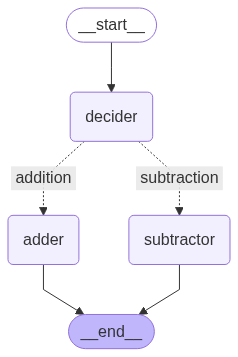

In [8]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


In [9]:
result = app.invoke({'number1':1,'number2':2,'operation':'+'})

print(result)


result = app.invoke({'number1':1,'number2':2,'operation':'-'})

print(result)

{'number1': 1, 'number2': 2, 'operation': '+', 'finalNumber': 3}
{'number1': 1, 'number2': 2, 'operation': '-', 'finalNumber': -1}
